## Combining the CSV of all Participants

In [1]:
import os
import pandas as pd
import datetime as dt
import imageio
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
#from keras.models import Sequential, Model


#Basics
#from __future__ import division

#Stats
#import mne
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLMParams
#import preBert
from statsmodels.stats.weightstats import DescrStatsW

import mystats 


import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from scipy import stats
import warnings
from scipy.stats.mstats import zscore
#matplotlib.use('TkAgg')  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hac
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
#import mne
#import pyvttbl as pt

import mycharite
import mystats 

## Analysis of SSI-Video itself

9598
9598
all non-successfully tracked frames excluded
all frames excluded that were tracked with a lower confidence than 0.75
9598
27
97
191
239
141
9598
                     AU06_c    AU12_c    AU15_c    AU09_c    AU04_c
conversation_part                                                  
2                  0.562500  0.967988  0.149390  0.000000  0.000000
3                  0.399808  0.937680  0.018217  0.009588  0.000000
4                  0.429952  0.950081  0.133655  0.000000  0.000000
5                  0.733333  0.993827  0.006173  0.019753  0.016049
6                  0.062814  0.513819  0.092965  0.059045  0.170854
7                  0.500952  0.848571  0.042857  0.017143  0.140000


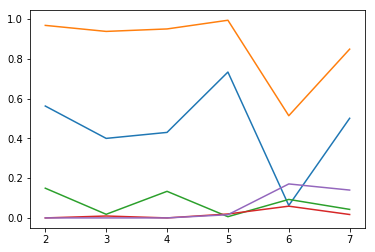

                     AU06_c    AU12_c    AU15_c    AU09_c    AU04_c
conversation_part                                                  
2                  0.496457  0.176167  0.356745  0.000000  0.000000
3                  0.490094  0.241852  0.133798  0.097493  0.000000
4                  0.495468  0.217954  0.340556  0.000000  0.000000
5                  0.442490  0.078373  0.078373  0.139237  0.125743
6                  0.242781  0.500123  0.290566  0.235858  0.376618
7                  0.500237  0.358637  0.202631  0.129865  0.347152


In [2]:
study='charite'
VIT=mycharite.load_VIT_actress_AU()

print (len(VIT))
VIT=VIT[VIT.success==1].reset_index(drop=True) #exclude non-sucessfull tracks
print (len(VIT))
print ('all non-successfully tracked frames excluded')

VIT=VIT[VIT.confidence>0.75].reset_index(drop=True)
print ('all frames excluded that were tracked with a lower confidence than 0.75')
print (len(VIT))


VIT=mycharite.outlier_trials(VIT,['AU06_r', 'AU12_r','AU15_r', 'AU09_r', 'AU04_r'], 'sd')
print (len(VIT))

#a=VIT[VIT.conversation_part>1].groupby('frame').mean()[['AU06_r', 'AU12_r','AU15_r', 'AU09_r', 'AU04_r']]
a=VIT[VIT.conversation_part>1].groupby('conversation_part').mean()[['AU06_c', 'AU12_c','AU15_c', 'AU09_c', 'AU04_c']]

print (a)

plt.plot(a)
#plt.legend(['AU06_c', 'AU12_c', 'AU15_c', 'AU09_c',  'AU04_c'])# da stimmt was mit der LEgende nicht!!
plt.savefig('AU_actress.png')
plt.show()

a=VIT[VIT.conversation_part>1].groupby('conversation_part').std()[['AU06_c', 'AU12_c','AU15_c', 'AU09_c', 'AU04_c']]
print (a)

In [3]:
var=['AU06_r', 'AU12_r','AU15_r', 'AU09_r', 'AU04_r']
#speaking
print ('joy')
for i in var:
    print (i)

    print (np.mean(VIT[VIT.conversation_part==4][i]))

print ('disgust')
for i in var:
    print (i)
    print (np.mean(VIT[VIT.conversation_part==6][i]))

joy
AU06_r
0.9704025764895321
AU12_r
1.2036231884057975
AU15_r
0.12774557165861525
AU09_r
0.05088566827697263
AU04_r
0.057616747181964585
disgust
AU06_r
0.606193467336683
AU12_r
0.7175376884422106
AU15_r
0.12665829145728644
AU09_r
0.07017587939698496
AU04_r
0.23125628140703494


In [4]:
var=['AU06_r', 'AU12_r','AU15_r', 'AU09_r', 'AU04_r']
#speaking
print ('joy')
for i in var:
    print (i)

    print (np.mean(VIT[VIT.conversation_part==5][i]))

print ('disgust')
for i in var:
    print (i)
    print (np.mean(VIT[VIT.conversation_part==7][i]))

joy
AU06_r
1.1491111111111116
AU12_r
1.3631728395061724
AU15_r
0.12003703703703704
AU09_r
0.04381481481481479
AU04_r
0.02209876543209877
disgust
AU06_r
0.9518285714285717
AU12_r
1.109904761904762
AU15_r
0.10692380952380966
AU09_r
0.061161904761904785
AU04_r
0.12827619047619016


In [5]:
#speaking
var=['AU06_c', 'AU12_c']
for i in var:
    print (i)
    speaks=VIT[(VIT.conversation_part==2) | (VIT.conversation_part==4) | (VIT.conversation_part==6)]
    listens=VIT[(VIT.conversation_part==3) | (VIT.conversation_part==5) | (VIT.conversation_part==7)]
    print(np.mean(speaks[i]))
    print(np.mean(listens[i]))
    #mystats.two_ind_sample_tests(speaks, listens, i)

AU06_c
0.3309213699951761
0.5294522907337237
AU12_c
0.7882296189097926
0.9211160868067516


In [6]:
def what_is():
    for i in set(VIT.conversation_part):
        print (i)
        print (len(VIT[VIT.conversation_part==i])/25)

    print (len(VIT)/25)
    len(onep)/30

    df_vpn=df[df.vpn==4]

    for i in set(df_vpn.conversation):
        print (i)
        print (len(df_vpn[df_vpn.conversation==i])/25)

    print (len(VIT)/25)
    len(df_vpn)/30

# Analysis of Charite Data

### Load dataframe

In [7]:
VIT=mycharite.load_VIT_actress_AU()
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
mimicry, new_features=mycharite.calc_mim(df, VIT)
df=pd.merge(df, mimicry, on='vpn')

df=mycharite.aq_charite(df)
df=mycharite.ados_charite(df)
df=mycharite.adapt_times(df)

AU06_r
AU12_r
AU06_c


C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


AU12_c
AU15_r
AU09_r
AU04_r
AU15_c
AU09_c
AU04_c
gaze_angle_x
gaze_angle_y
Proband 53 ist korrekt als NT gelabelt


In [8]:
#mycharite.check(df)
print ('NT ' + str(sum(df.groupby('vpn').mean().asc==0)))
print ('ASC ' + str(sum(df.groupby('vpn').mean().asc==1)))

NT 43
ASC 37


In [9]:
print (len(action_r))

17


### Korrelation of Diagnosis and AQ

In [11]:
from scipy import stats
df_aq=df.groupby('vpn').mean().dropna(subset=['asq']).reset_index(drop=True)
print (stats.pointbiserialr(df_aq.asc, df_aq.asq))

PointbiserialrResult(correlation=0.895717848576622, pvalue=9.197819656545238e-28)


### Distribution of AQ in NT and ASC

In [12]:
df[df.asq>0].groupby('vpn').mean().groupby('asc')['asq'].describe()

,count,mean,std,min,25%,50%,75%,max
asc,,,,,,,,
0.0,41.0,14.487805,5.818599,4.0,10.0,14.0,19.0,29.0
1.0,35.0,37.542857,5.736072,20.0,34.5,39.0,41.5,46.0


### Was the Feature Extraction Successfull and Complete for all Subjects?

In [13]:
def show_success_vpn(df):
    for i in set(df.vpn):
        print (i)
        print (len(df[df.vpn==i]))      
        print ('sucess')
        print (np.mean(df[df.vpn==i].success))  # Number of sucessfull trackted trials!
        print (np.mean(df[df.vpn==i].success)/len(df[df.vpn==i]))  

#### Unterscheiden sich die Gruppen hinsichtlich, wie gut sie erkannt wurden?

In [14]:
print (np.mean(df.success))
print (np.std(df.success))

print (np.mean(df.confidence))
print (np.std(df.confidence))
print (np.mean(df.confidence)-3*np.std(df.confidence))
print (np.min(df.groupby('vpn').mean().confidence))

print ('NT')
print (np.mean(df[df.asc==0].groupby('vpn').mean().success))
print (np.std(df[df.asc==0].groupby('vpn').mean().confidence))
print (np.mean(df[df.asc==0].groupby('vpn').mean().confidence))

print ('ASC')
print (np.mean(df[df.asc==1].groupby('vpn').mean().success))
print (np.mean(df[df.asc==1].groupby('vpn').mean().confidence))
print (np.std(df[df.asc==1].groupby('vpn').mean().confidence))

print (scipy.stats.ttest_ind(df[df.asc==0].groupby('vpn').mean().confidence, 
                             df[df.asc==1].groupby('vpn').mean().confidence))

0.9987862781047134
0.034817363117462335
0.9733113452986053
0.03786621137311299
0.8597127111792664
0.9131555555554114
NT
0.9986284978428217
0.013695089156780358
0.9733406808081646
ASC
0.9989696808937444
0.9732774010539653
0.011395320891431826
Ttest_indResult(statistic=0.021969594583111353, pvalue=0.9825283150518745)


warum wird die confidence durch die Outlier-Exclusion schlechter?

### Exclude non-confident trials and Outliers

In [10]:
df=mycharite.exclude_outlier(df)

set()
all participants excluded that were tracked with a successrate less than 0.9
935964
934828
all non-successfully tracked frames excluded
all frames excluded that were tracked with a lower confidence than 0.75
934828


In [16]:
def outlier_detection(df):
    var=['AU06_r', 'AU12_r', 'AU04_r']
    for vpn in set(df.vpn):
        df.loc[(df.vpn==vpn), :]=mycharite.outlier_trials(df.loc[(df.vpn==vpn), :], var, 'iq')
    return df

# this excludes a lot of frames - thus might not be useful as non-normally distributed

### Descriptives

In [17]:
face=['AU04_r', 'AU06_r', 'AU09_r', 'AU12_r']
new_features=new_features+face
for i in new_features:
    print (i)
    print (df.groupby('vpn').mean().groupby('asc')[i].describe())

correlation_AU06_r
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   43.0  0.048300  0.173138 -0.286235 -0.079251  0.035123  0.180347   
1.0   37.0  0.032896  0.154902 -0.235629 -0.079555  0.015992  0.179555   

          max  
asc            
0.0  0.474494  
1.0  0.340486  
correlation_AU12_r
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   43.0  0.025208  0.159271 -0.284496 -0.075000  0.022065  0.100711   
1.0   37.0  0.021879  0.186457 -0.277700 -0.133603  0.014218  0.159312   

          max  
asc            
0.0  0.496964  
1.0  0.618826  
correlation_AU06_c
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   38.0  0.040263  0.181467 -0.358369 -0.099330  0.038210  0.198055   

###  Smoothing the Signal

In [47]:
def smooth(df):
    round_df=df
    for i in set(df.vpn):
        for au in action_r:
            round_df.loc[round_df.vpn==i, au]=round_df.loc[round_df.vpn==i, au].rolling(30, win_type='triang').mean()
    return round_df

In [48]:
#round_df=smooth(df)

# 1) Mimicry of Joy and Disgust 

First, we checked whether the participants showed a similar feeling as the actress in the conversation part of disgust and joy. We compared the facial expression with the facial expression of the neutral part.

In [49]:
df['AU_joy']=(df.AU12_r + df.AU06_r)/2
df['AU_disgust']=df.AU04_r

In [50]:
df_neutral=df[((df.conversation=='neutral_speaker')|(df.conversation=='neutral_participant'))].groupby(['vpn']).mean().reset_index(drop=True)

## Joy

In [51]:
#compared to neutral
df_joy=df[((df.conversation=='joy_speaker') |(df.conversation=='joy_participant'))].groupby(['vpn']).mean().reset_index(drop=True)
print ('AU06_C')
mystats.two_dep_sample_tests(df_neutral, df_joy, 'AU06_c')
print ('AU12_C')
mystats.two_dep_sample_tests(df_neutral, df_joy, 'AU12_c')

#compared to neutral
df_joy=df[((df.conversation=='joy_speaker') |(df.conversation=='joy_participant'))].groupby(['vpn']).mean().reset_index(drop=True)
print ('AU06_r')
mystats.two_dep_sample_tests(df_neutral, df_joy, 'AU06_r')
print ('AU12_r')
mystats.two_dep_sample_tests(df_neutral, df_joy, 'AU12_r')

AU06_C
not normally distributed: p1=2.9427179551629046e-13 p2=1.625597226273534e-11
WilcoxonResult(statistic=232.0, pvalue=1.1050977698892616e-05)
Dataframe one
median:0.0012437810945273632
Dataframe two
median:0.037005649717514126
AU12_C
not normally distributed: p1=7.138238333759261e-10 p2=4.176862233862266e-08
WilcoxonResult(statistic=499.0, pvalue=0.00029695716349874735)
Dataframe one
median:0.09228855721393034
Dataframe two
median:0.19745762711864406
AU06_r
not normally distributed: p1=1.11676797587279e-06 p2=2.4959086658782326e-05
WilcoxonResult(statistic=567.0, pvalue=7.398447671944013e-07)
Dataframe one
median:0.3280017164179102
Dataframe two
median:0.4256355932203385
AU12_r
not normally distributed: p1=1.5641478512407048e-07 p2=1.4313030760604306e-06
WilcoxonResult(statistic=703.0, pvalue=1.0915470729433998e-05)
Dataframe one
median:0.2405323383084576
Dataframe two
median:0.30412429378531003


## Disgust

In [52]:
#compared to neutral
df_disgust=df[((df.conversation=='disgust_speaker')|(df.conversation=='disgust_participant'))].groupby(['vpn']).mean().reset_index(drop=True)
#my.two_ind_sample_tests(df_disgust, df_neutral, 'AU04_r')

mystats.two_dep_sample_tests(df_neutral, df_disgust, 'AU04_c')
mystats.two_dep_sample_tests(df_neutral, df_disgust, 'AU04_r')

not normally distributed: p1=2.4342949354312792e-17 p2=4.9409387268311414e-17
WilcoxonResult(statistic=278.0, pvalue=0.9643706868158897)
Dataframe one
median:0.0
Dataframe two
median:0.0
not normally distributed: p1=8.212313072413976e-14 p2=1.043396529658118e-13
WilcoxonResult(statistic=1044.0, pvalue=0.06423928037880697)
Dataframe one
median:0.056064676616915554
Dataframe two
median:0.05798451431252934


## 2) Statistical Comparing the AU of ASD and NT

In [53]:
def group_comparison(df):
    print ('joy')
    df_joy=df[((df.conversation=='joy_speaker') |(df.conversation=='joy_participant'))].groupby(['vpn']).mean().reset_index(drop=True)

    df_nt=df_joy[df_joy.asc==0]
    df_asc=df_joy[df_joy.asc==1]

    print ('AU_06c')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU06_c')

    print ('AU_06r')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU06_r')

    print ('AU12_c')
    U,p= scipy.stats.mannwhitneyu(df_nt['AU12_c'], df_asc['AU12_c'])
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU12_c')
    n1=len(df_nt['AU12_c'])
    n2=len(df_asc['AU12_c'])
    effectsize=1-(2*U/(n1*n2))
    print (effectsize)
    print ('AU_12r')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU12_r')


    print ('disgust')
    df_disgust=df[((df.conversation=='disgust_speaker')|(df.conversation=='disgust_participant'))].groupby(['vpn']).mean().reset_index(drop=True)

    df_nt=df_disgust[df_disgust.asc==0]
    df_asc=df_disgust[df_disgust.asc==1]
    print('AU04_c')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU04_c')
    print('AU04_r')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU04_r')


    print ('complete conversation')
    df=df[df.conversation!='intro']

    df_nt=df[df.asc==0].groupby(['vpn']).mean().reset_index(drop=True)
    df_asc=df[df.asc==1].groupby(['vpn']).mean().reset_index(drop=True)
    print ('AU12_C')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU12_c')
    print ('AU12_r')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU12_r')
    print ('AU06_C')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU06_c')
    print ('AU06_r')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'AU06_r')

In [54]:
group_comparison(df)

joy
AU_06c
not normally distributed: p1=7.428380968121928e-07 p2=8.568573406364521e-09
Mann-Whitney-U-Test: U=674.5p=0.11835440031324707
Effectsize:0.15210559396605905
Dataframe one
median:0.0576271186440678
Dataframe two
median:0.03502824858757062
AU_06r
not normally distributed: p1=0.02160686068236828 p2=0.00014690466923639178
Mann-Whitney-U-Test: U=677.0p=0.12742196757154478
Effectsize:0.14896291640477688
Dataframe one
median:0.48370056497175157
Dataframe two
median:0.353615819209038
AU12_c
distributions of samples is not equal
K=: 0.4116907605279698
p=0.0015143578102682742
not normally distributed: p1=0.00027006518212147057 p2=8.557353226024134e-07
Mann-Whitney-U-Test: U=578.0p=0.017684133538499323
Effectsize:0.27341294783155246
Dataframe one
median:0.39717514124293785
Dataframe two
median:0.11751412429378531
0.27341294783155246
AU_12r
not normally distributed: p1=0.001435295445844531 p2=4.935819742968306e-05
Mann-Whitney-U-Test: U=639.0p=0.06611699811842248
Effectsize:0.1967316153

In [7]:
def mimicry_group_conversation(df, features):
    print ('complete conversation')
    df=df[df.conversation!='intro']
    
    df_nt=df[df.asc==0].groupby(['vpn']).mean().reset_index(drop=True)
    df_asc=df[df.asc==1].groupby(['vpn']).mean().reset_index(drop=True)
    for fea in features:

        print (fea)
        mystats.two_ind_sample_tests(df_nt[df_nt[fea]>0], df_asc[df_asc[fea]>0], fea)
    

In [8]:
features=['correlation_AU06_c', 'correlation_AU12_c', 'correlation_AU15_r',
   'correlation_AU09_r', 'correlation_AU04_r', 'correlation_AU15_c',
   'correlation_AU09_c', 'correlation_AU04_c',
         'correlation_gaze_angle_x', 'correlation_gaze_angle_y']

mimicry_group_conversation(df, features)

complete conversation
correlation_AU06_c
distributions of samples is not equal
K=: 0.4294117647058824
p=0.047161235849059825
not normally distributed: p1=0.432197242975235 p2=0.013972083106637001
Mann-Whitney-U-Test: U=113.0p=0.04254385772957274
Effectsize:0.33529411764705885
Dataframe one
median:0.19457204176633763
Dataframe two
median:0.07665286881727515
correlation_AU12_c
normally distributed - now variance homogenity is checked:
Ttest_indResult(statistic=0.3104109636480048, pvalue=0.7576816348384683)
Effect Size for Independent T-Test
0.09273399948450975
Dataframe one
mean:0.1793710797747395
Confidence Intervall
(0.1310733499556121, 0.22766880959386687)
Dataframe two
mean:0.16942978904384506
Confidence Intervall
(0.12398272100388101, 0.21487685708380905)
correlation_AU15_r
not normally distributed: p1=0.026923280209302902 p2=0.28113701939582825
Mann-Whitney-U-Test: U=122.0p=0.1570514983621648
Effectsize:0.20261437908496727
Dataframe one
median:0.10587044534413474
Dataframe two
medi

In [ ]:
mimicry_group_conversation(df)

In [ ]:
#FEMALE
def gender_based_analysis (df):
    print ('female')
    group_comparison(df[df.sex==1])
    print ('male')
    group_comparison(df[df.sex==2])

In [ ]:
def time_plot(df, var, title):
    plt.plot(np.array(df[df.asc==1].reset_index(drop=True).groupby(['counter']).mean()[var]), color='green')
    plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['counter']).mean()[var]), color='blue')
    #scale!!!
    plt.title(str(title))
    plt.show()
  
   
for con in np.unique(df.conversation):
    time_plot(df[df.conversation==con], 'AU12_r', con) #sc

In [ ]:
df['proband']=(df.conversation=='joy_participant')|(df.conversation=='disgust_participant')|(df.conversation=='neutral_participant')
df['actress']=(df.conversation=='joy_speaker')|(df.conversation=='disgust_speaker')|(df.conversation=='neutral_speaker')
df.loc[(df.conversation!='intro'), "whospeaks"] = df[['proband', 'actress']].idxmax(axis=1) 

In [ ]:
df.columns
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['conversationpart'] = LE.fit_transform(df['conversation'])

In [ ]:
print ('AU12')
data=df[df.sex==1].groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_c' + " ~ asc*conversationpart", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

In [ ]:
plt.hist(df.groupby(['vpn']).mean().reset_index().AU12_r)
plt.show()

## Mimicry-Analysis

In [ ]:
for i in new_features:
    print (i)
    plt.hist(df[df.asc==0].groupby(['vpn']).mean().reset_index()[i], color='blue')
    print (np.mean(df[df.asc==0].groupby(['vpn']).mean().reset_index()[i]))
    plt.hist(df[df.asc==1].groupby(['vpn']).mean().reset_index()[i], color='red')
    print (np.mean(df[df.asc==1].groupby(['vpn']).mean().reset_index()[i]))
    plt.show()
    print (scipy.stats.ttest_ind((df[df.asc==0].groupby(['vpn']).mean().reset_index()[i]), 
           (df[df.asc==1].groupby(['vpn']).mean().reset_index()[i])))

In [ ]:
print ('AU12')
data=df.groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_c' + " ~ asc+sex", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

print ('AU12')
data=df.groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_r' + " ~ asc", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

In [ ]:
print ('AU12')
data=df[df.sex==2].groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_c' + " ~ asc*conversationpart", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

In [ ]:
print ('AU12')
data=df[df.sex==1].groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_r' + " ~ asc*conversationpart", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

In [ ]:
print ('AU12')
data=df[df.sex==2].groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU12_r' + " ~ asc*conversationpart", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

In [ ]:
print ('AU12')
data=df.groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('AU06_r' + " ~ asc*conversationpart", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())

C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


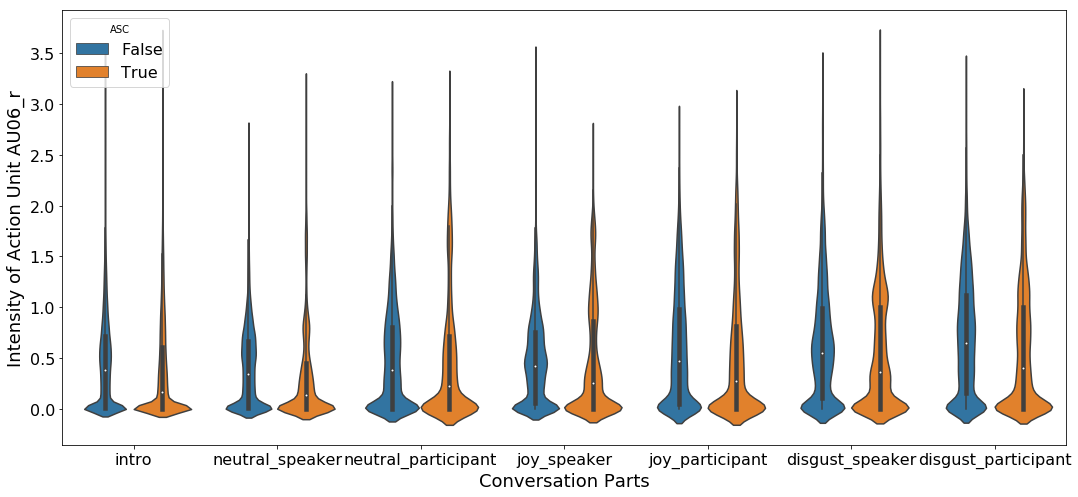

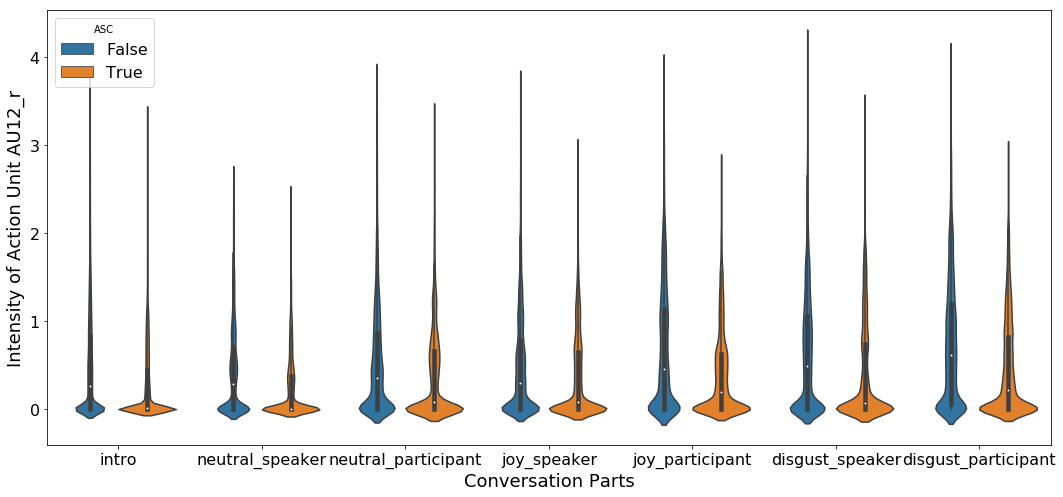

In [18]:
def AUboxplot_ASC_NT(df):
    relevant_AU=['AU06_r', 'AU12_r']#, 'AU09_r','AU15_r', 'AU04_r']
    for i in relevant_AU:
        plt.figure(figsize=(18, 8)) 
        fig=sns.violinplot(x='conversation', y=i, hue='asc', data=df)
        plt.yticks(fontsize=16)    
        plt.xticks(fontsize=16)  
        plt.xlabel('Conversation Parts', fontsize=18) 
        plt.ylabel(('Intensity of Action Unit ' + str(i)), fontsize=18)
        plt.legend(title='ASC', loc = "upper left", fontsize=16)
        plt.savefig('AU_'+ str(i) + '_.png')
        #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
        plt.show()
AUboxplot_ASC_NT(df)

C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


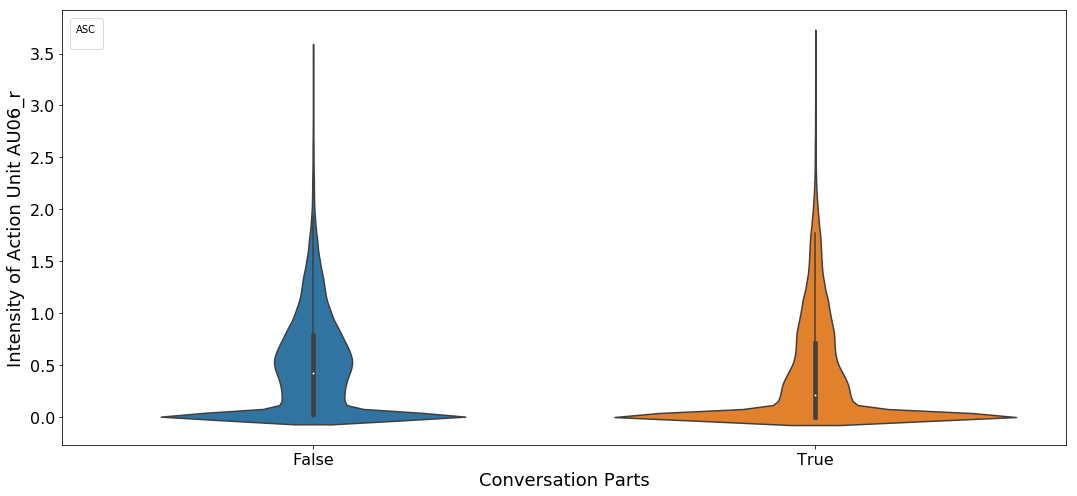

No handles with labels found to put in legend.


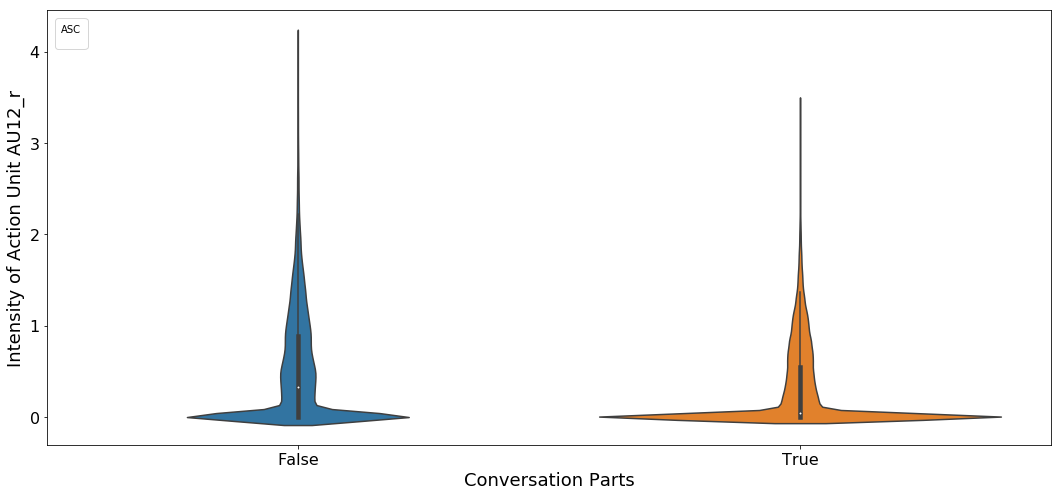

In [11]:
relevant_AU=['AU06_r', 'AU12_r']#, 'AU09_r','AU15_r', 'AU04_r']
for i in relevant_AU:
    plt.figure(figsize=(18, 8)) 
    fig=sns.violinplot(x='asc', y=i, data=df)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Conversation Parts', fontsize=18) 
    plt.ylabel(('Intensity of Action Unit ' + str(i)), fontsize=18)
    plt.legend(title='ASC', loc = "upper left", fontsize=16)
    plt.savefig('AU_'+ str(i) + '_.png')
    #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
    plt.show()


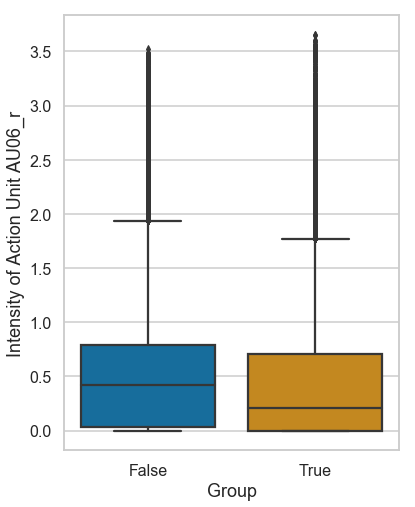

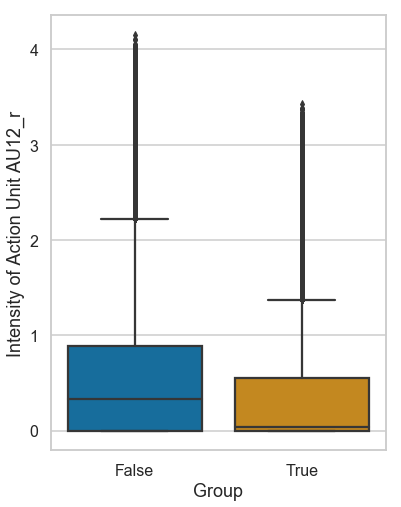

In [35]:
relevant_AU=['AU06_r', 'AU12_r']#, 'AU09_r','AU15_r', 'AU04_r']
sns.set_style("whitegrid")
sns.set_context("talk")
for i in relevant_AU:
    plt.figure(figsize=(6, 8)) 
    fig=sns.boxplot(x='asc', y=i, data=df, whis=1.5, palette=sns.color_palette("colorblind"))
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Group', fontsize=18) 
    plt.ylabel(('Intensity of Action Unit ' + str(i)), fontsize=18)
    #plt.legend(title='ASC', loc = "upper left", fontsize=16)
    plt.savefig('AU_'+ str(i) + '_.png')
    plt.savefig('AU_'+ str(i) + '_.pdf')
    #print (df[df.asc==0].reset_index(drop=True).groupby(['vpn', 'conversation']).mean()[i])
    plt.show()

In [ ]:
# Association with Markers

In [ ]:
demog=pd.read_csv('./charite/demo_data_charite.csv', encoding='latin-1')

In [ ]:
def associations(ados):
    var=['AU12_r', 'AU12_c', 'AU06_r', 'AU06_c']


    for v in var:
        print (v)
        print('ados-social')
        a=ados[(ados.asc==1)&(ados.conversation!='intro')].groupby('vpn').mean()[['ados_social', v]].dropna()
        mystats.correlation(a.ados_social, a[v])
        print('aq')
        a=ados[(ados.asc==1)&(ados.conversation!='intro')].groupby('vpn').mean()[['asq', v]].dropna()
        mystats.correlation(a.asq, a[v])
        print('ados')
        a=ados[(ados.asc==0)&(ados.conversation!='intro')].groupby('vpn').mean()[['asq', v]].dropna()
        mystats.correlation(a.asq, a[v])

In [ ]:
associations(df[df.sex==1])

In [ ]:
associations(df[df.sex==2])

In [ ]:
mystats.two_ind_sample_tests(df[df.sex==1].reset_index(drop=True).groupby('vpn').mean(),
                             df[df.sex==2].reset_index(drop=True).groupby('vpn').mean(), 'asq')

In [ ]:
stats.ttest_ind(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().asq.dropna(),
                df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().asq.dropna())

In [ ]:
stats.ttest_ind(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().ados_total.dropna(), 
                df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().ados_total.dropna())

In [ ]:
print (np.mean(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().ados_total.dropna()))
print (np.mean(df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().ados_total.dropna()))

stats.ttest_ind(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().ados_total.dropna(), 
       df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().ados_total.dropna())

In [ ]:
print (np.mean(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().asq.dropna()))
print (np.mean(df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().asq.dropna()))


stats.ttest_ind(df[(df.asd==11) & (df.sex==1)].groupby('vpn').mean().asq.dropna(), 
       df[(df.asd==11) & (df.sex==2)].groupby('vpn').mean().asq.dropna())

In [ ]:
# STUFF THAT MIGHT BE USEFUL

In [ ]:
df_pt = pt.DataFrame(data[['muscle_activity', 'vpn', 'muscle', 'val']])
(aov)=df_pt.anova('muscle_activity', sub='vpn', wfactors=['muscle', 'val'])
print(aov)

In [ ]:
emotion=2
muscle=2

print ('Effect of Muscle and Emotion over time')
data=np.array(pd.concat([df_pos_vpn[cor_s], df_pos_vpn[zyg_s], 
                         df_neg_vpn[cor_s], df_neg_vpn[zyg_s]], axis=1))
factorlevels=[emotion, muscle, time]


print (mne.stats.f_mway_rm(data, factorlevels, effects='A*B'))
print (mne.stats.f_mway_rm(data, factorlevels, effects='A*B*C'))


In [ ]:
def calculate_AU_argmax(df):
    
    var=['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
         'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r',
         'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r',
         'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

    features=[]
    print 'calculation started'

    grouped_df=df.groupby(['vpn', 'count_Picture'])
    print'grouped done'

       # table.as_matrix()
    operation=['max', lambda x: (np.argmax(x.as_matrix()))] 
                   #lambda x: (skew(x)), 
                   #lambda x: (kurtosis(x))]
                   #lambda x: (np.where(x>0)[0])]
    operation_name=['max', 'argmax']            

    features=[]
    for unit in var:

        for i, op in enumerate(operation):
                feature_name=unit+'_'+operation_name[i]
                df.loc[:,feature_name]=grouped_df[unit].transform(op)
                features.append(feature_name)    
                
    df=df[df.success==1].reset_index(drop=True)
    df=df[df.confidence>.9].reset_index(drop=True)
    
    return df


# In[ ]:

def calculate_AU_actor_difference(df):
    
    var=['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 
         'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 
         'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 
         'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

    var_act=['AU01_r_actor', 'AU02_r_actor', 'AU04_r_actor', 'AU05_r_actor', 
             'AU06_r_actor', 'AU07_r_actor', 'AU09_r_actor', 'AU10_r_actor', 
             'AU12_r_actor', 'AU14_r_actor', 'AU15_r_actor', 'AU17_r_actor', 
             'AU20_r_actor', 'AU23_r_actor', 'AU25_r_actor', 'AU26_r_actor', 'AU45_r']

    diff_var=[]

    for i, v in enumerate(var):
        variable='Diff_'+v
        df[variable] = df[v] - df[var_act[i]]

        diff_var.append(variable)

    df[diff_var]=df[diff_var].abs()
    
    df['diff_to_actors']=df[diff_var].sum(axis=1)
    
    return df


# In[ ]:

#Calculation of Relevant AU Activity

#hier wird mean auf frame basis berechnet..

def compute_relAU_frame(df):

    set(df.emo_label)
    for emo in set(df.emo_label):
        print str(emo)
        if str(emo)=='anger':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU04_r+df.AU05_r+df.AU07_r+df.AU23_r)/4 
        if str(emo)=='fear':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU01_r+df.AU02_r+df.AU04_r+df.AU05_r+df.AU07_r+df.AU20_r+df.AU26_r)/7
        if str(emo)=='disgust':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU09_r+df.AU15_r)/2 # df.AU16_r gibt es nicht
        if str(emo)=='joy':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU06_r+df.AU12_r)/2
        if str(emo)=='sadness':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU01_r+df.AU04_r+df.AU15_r)/3       
        if str(emo)=='suprise':
            df.loc[df.emo_label==str(emo), 'rel_AU']=(df.AU01_r+df.AU02_r+df.AU05_r+df.AU26_r)/4
                
            
    for emo in set(df.emo_label):
        print str(emo)
        if str(emo)=='anger':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU04_c+df.AU05_c+df.AU07_c+df.AU23_c)/4 
        if str(emo)=='fear':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU01_c+df.AU02_c+df.AU04_c+df.AU05_c+df.AU07_c+df.AU20_c+df.AU26_c)/7
        if str(emo)=='disgust':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU09_c+df.AU15_c)/2 # df.AU16_r gibt es nicht
        if str(emo)=='joy':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU06_c+df.AU12_c)/2
        if str(emo)=='sadness':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU01_c+df.AU04_c+df.AU15_c)/3       
        if str(emo)=='suprise':
            df.loc[df.emo_label==str(emo), 'rel_AU_c']=(df.AU01_c+df.AU02_c+df.AU05_c+df.AU26_c)/4
            
            
    for emo in set(df.emo_label):

        if str(emo)=='anger':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU04_r_max+df.AU05_r_max+df.AU07_r_max+df.AU23_r_max)/4 
        if str(emo)=='fear':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU01_r_max+df.AU02_r_max+df.AU04_r_max+df.AU05_r_max+df.AU07_r_max+df.AU20_r_max+df.AU26_r_max)/7
        if str(emo)=='disgust':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU09_r_max+df.AU15_r_max)/2 # df.AU16_r gibt es nicht
        if str(emo)=='joy':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU06_r_max+df.AU12_r_max)/2
        if str(emo)=='sadness':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU01_r_max+df.AU04_r_max+df.AU15_r_max)/3       
        if str(emo)=='suprise':
            df.loc[df.emo_label==str(emo), 'rel_AU_maximum']=(df.AU01_r_max+df.AU02_r_max+df.AU05_r_max+df.AU26_r_max)/4
                          
    for emo in set(df.emo_label):
        
        if str(emo)=='anger':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU04_r_argmax+df.AU05_r_argmax+df.AU07_r_argmax+df.AU23_r_argmax)/4 
        if str(emo)=='fear':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU01_r_argmax+df.AU02_r_argmax+df.AU04_r_argmax+df.AU05_r_argmax+df.AU07_r_argmax+df.AU20_r_argmax+df.AU26_r_argmax)/7
        if str(emo)=='disgust':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU09_r_argmax+df.AU15_r_argmax)/2 # df.AU16_r gibt es nicht
        if str(emo)=='joy':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU06_r_argmax+df.AU12_r_argmax)/2
        if str(emo)=='sadness':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU01_r_argmax+df.AU04_r_argmax+df.AU15_r_argmax)/3       
        if str(emo)=='suprise':
            df.loc[df.emo_label==str(emo), 'rel_AU_argmax']=(df.AU01_r_argmax+df.AU02_r_argmax+df.AU05_r_argmax+df.AU26_r_argmax)/4

    return df


# In[ ]:

def calculate_relAU_pic(df):

    
    var=['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
         'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r',
         'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r',
         'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

    features=[]
    print 'calculation started'

    grouped_df=df.groupby(['vpn', 'count_Picture'])
    print'grouped done'

       # table.as_matrix()
    operation=['max', 'mean', 'std'] 
                   #lambda x: (skew(x)), 
                   #lambda x: (kurtosis(x))]
                   #lambda x: (np.where(x>0)[0])]
    operation_name=['max', 'mean', 'std']            

    features=[]
    for unit in var:

        for i, op in enumerate(operation):
                feature_name=unit+'_'+operation_name[i]
                
                df.loc[:,feature_name]=grouped_df[unit].transform(op)
                features.append(feature_name)    

    return df
